In [1]:
from dataset_functions import *
import numpy as np
import seaborn as sns

df, target = get_dataset()

Features:  Index(['match_id_hash', 'game_time', 'game_mode', 'lobby_type',
       'objectives_len', 'chat_len', 'r1_hero_id', 'r1_kills', 'r1_deaths',
       'r1_assists',
       ...
       'd5_stuns', 'd5_creeps_stacked', 'd5_camps_stacked', 'd5_rune_pickups',
       'd5_firstblood_claimed', 'd5_teamfight_participation',
       'd5_towers_killed', 'd5_roshans_killed', 'd5_obs_placed',
       'd5_sen_placed'],
      dtype='object', length=246) 

Target Columns:  Index(['match_id_hash', 'game_time', 'radiant_win', 'duration',
       'time_remaining', 'next_roshan_team'],
      dtype='object') 

Filtering Df:  (game_mode == 2 or game_mode == 22) and game_time > 0 

Dropped:  ['lobby_type', 'chat_len', 'game_mode'] 

Dataframe Shape:  (32153, 243) 



Max Coor: 188
Min Coor: 66


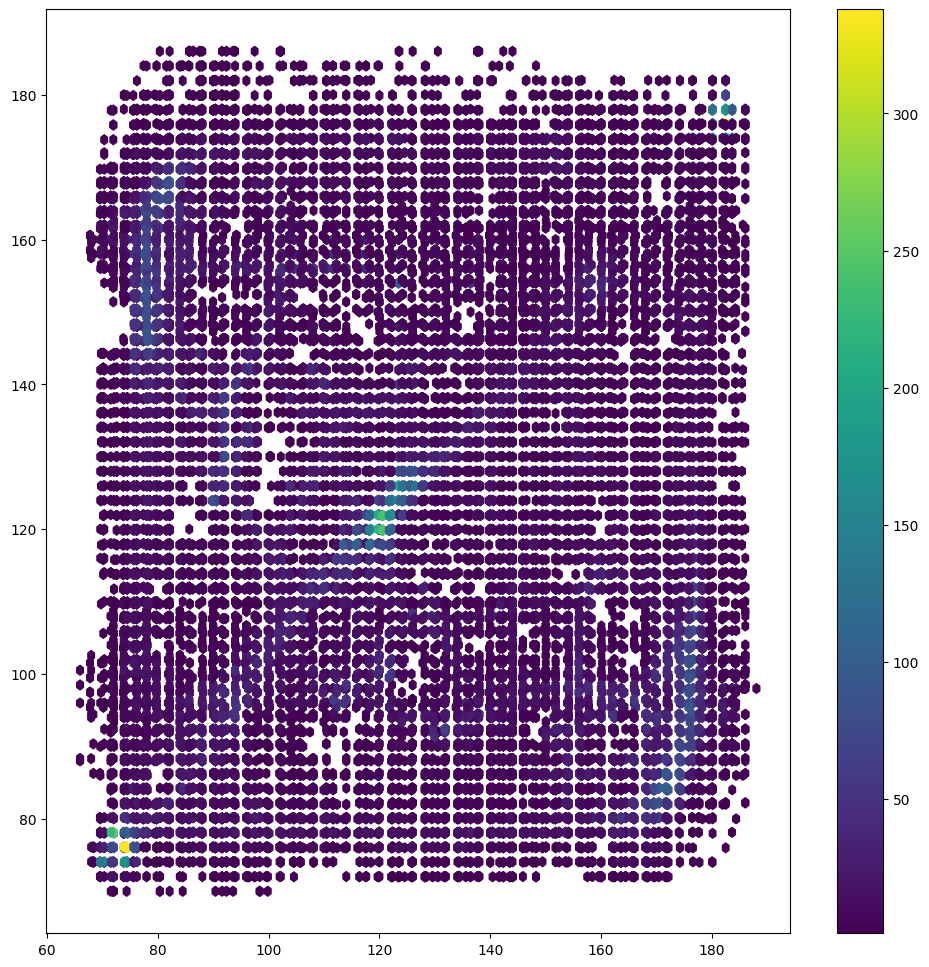

Number of Odd Coordinate: 0


In [2]:
import matplotlib.pyplot as plt

max_coor = []
min_coor = []

for i in range(5):
    max_coor.append(df[f"d{i+1}_x"].max())
    max_coor.append(df[f"d{i+1}_y"].max())
    max_coor.append(df[f"r{i+1}_x"].max())
    max_coor.append(df[f"r{i+1}_y"].max())
    min_coor.append(df[f"d{i+1}_x"].min())
    min_coor.append(df[f"d{i+1}_y"].min())
    min_coor.append(df[f"r{i+1}_x"].min())
    min_coor.append(df[f"r{i+1}_y"].min())

print("Max Coor:",np.max(max_coor))
print("Min Coor:",np.min(min_coor))

df_early = df#df.query("game_time < 31 and game_time >19")

plt.figure(figsize=(12,12))
plt.hexbin(df_early["d1_x"],df_early["d1_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["d2_x"],df_early["d2_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["d3_x"],df_early["d3_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["d4_x"],df_early["d4_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["d5_x"],df_early["d5_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["r1_x"],df_early["r1_y"],mincnt=1)#,c="red")
plt.hexbin(df_early["r2_x"],df_early["r2_y"],mincnt=1)#,c="red")
plt.hexbin(df_early["r3_x"],df_early["r3_y"],mincnt=1)#,c="red")
plt.hexbin(df_early["r4_x"],df_early["r4_y"],mincnt=1)#,c="red")
plt.hexbin(df_early["r5_x"],df_early["r5_y"],mincnt=1)#,c="red")
plt.colorbar()
plt.show()

print("Number of Odd Coordinate:",np.sum([(df["d3_y"] % 2) == 1]))

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 



array([[<Axes: title={'center': 'r1_hero_id'}>,
        <Axes: title={'center': 'r2_hero_id'}>,
        <Axes: title={'center': 'r3_hero_id'}>],
       [<Axes: title={'center': 'r4_hero_id'}>,
        <Axes: title={'center': 'r5_hero_id'}>,
        <Axes: title={'center': 'd1_hero_id'}>],
       [<Axes: title={'center': 'd2_hero_id'}>,
        <Axes: title={'center': 'd3_hero_id'}>,
        <Axes: title={'center': 'd4_hero_id'}>],
       [<Axes: title={'center': 'd5_hero_id'}>, <Axes: >, <Axes: >]],
      dtype=object)

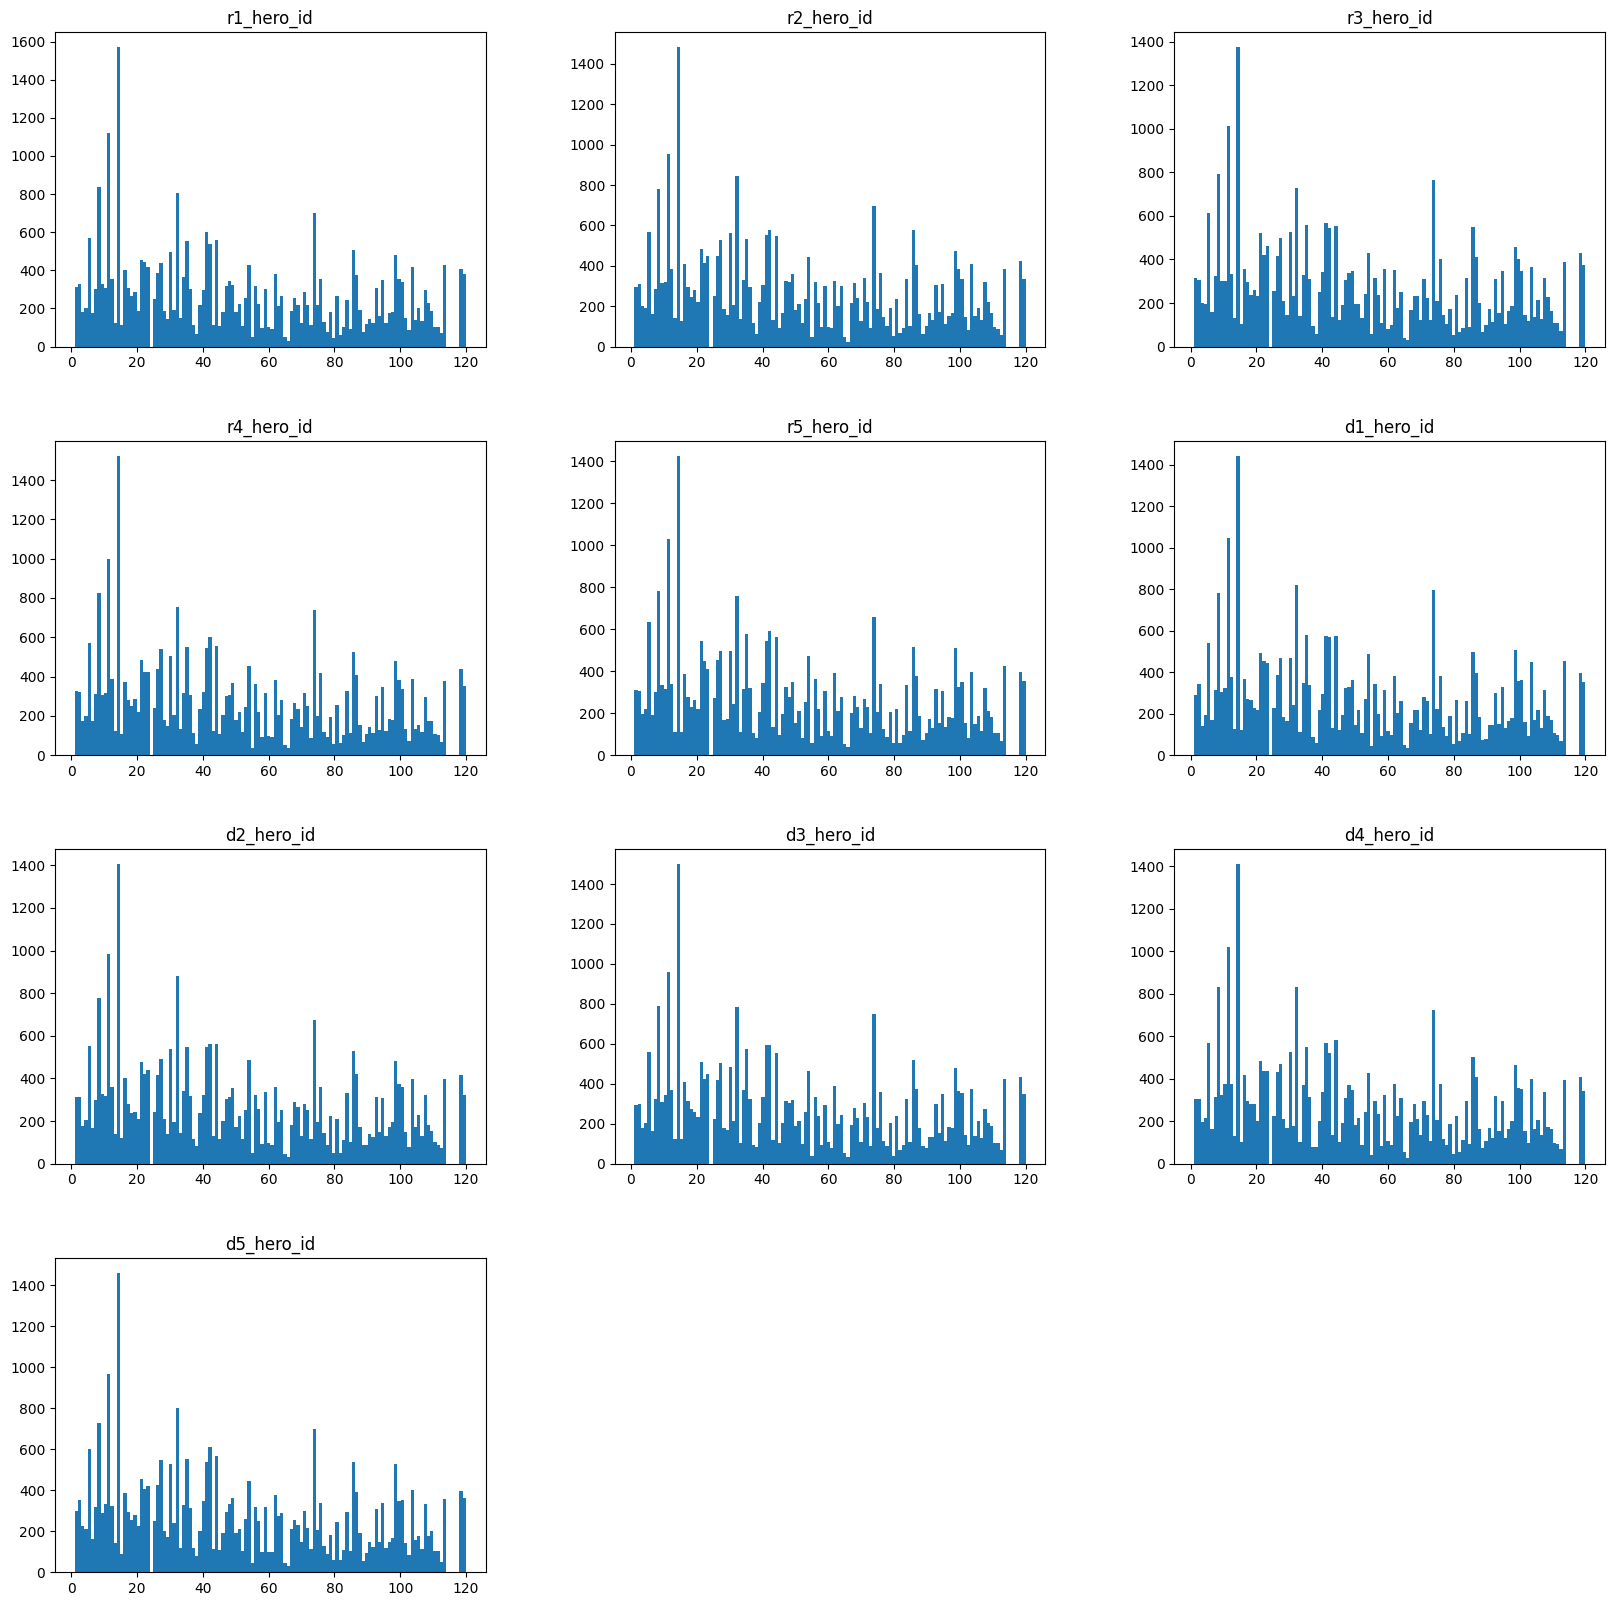

In [3]:
hero_id_labels = get_hero_id_labels(df)

df[hero_id_labels].hist(
    figsize=(20,20),
    bins=120,
    grid=False
)

In [4]:
df_psph,target_psth = playerstats_playerheros_transform(df,target)

(32153, 6)


(32153, 6)


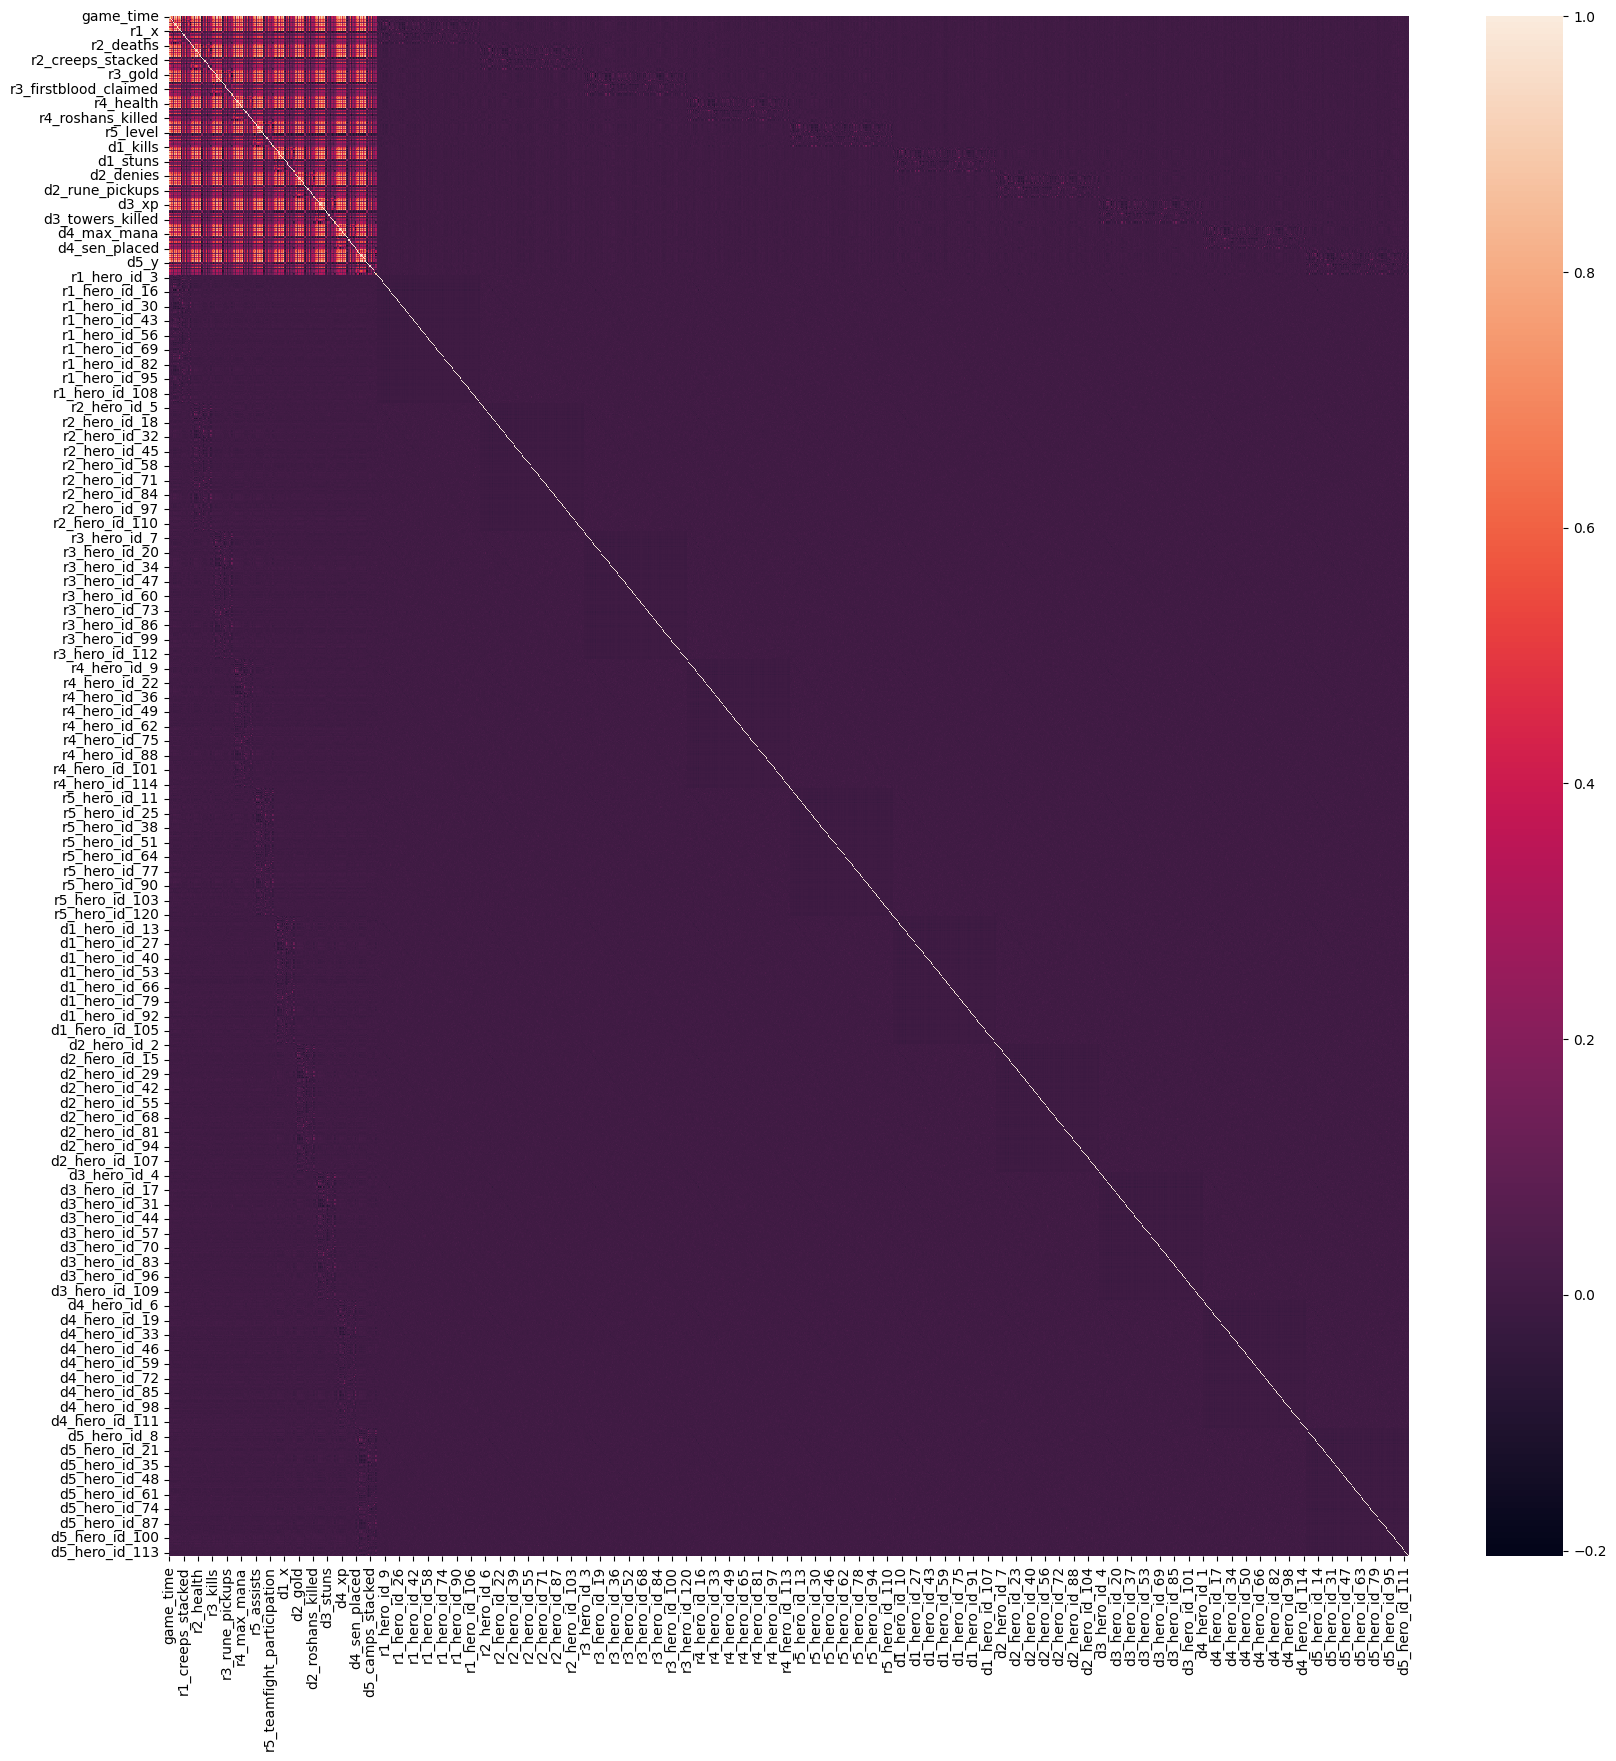

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_psph.corr())
plt.show()

In [5]:
df_psth,target_psth = playerstats_teamheros_transform(df,target)

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

Dataframe Shape: (32153, 473) 

NaN Count:  0 

(32153, 6)


Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

Dataframe Shape: (32153, 473) 

NaN Count:  0 



c:\Users\panal\VSCode\ML-Project\code\dataset_functions.py:104: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  (df["r4_hero_id"] == hero_id) |
c:\Users\panal\VSCode\ML-Project\code\dataset_functions.py:97: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
c:\Users\panal\VSCode\ML-Project\code\dataset_functions.py:104: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

(32153, 6)


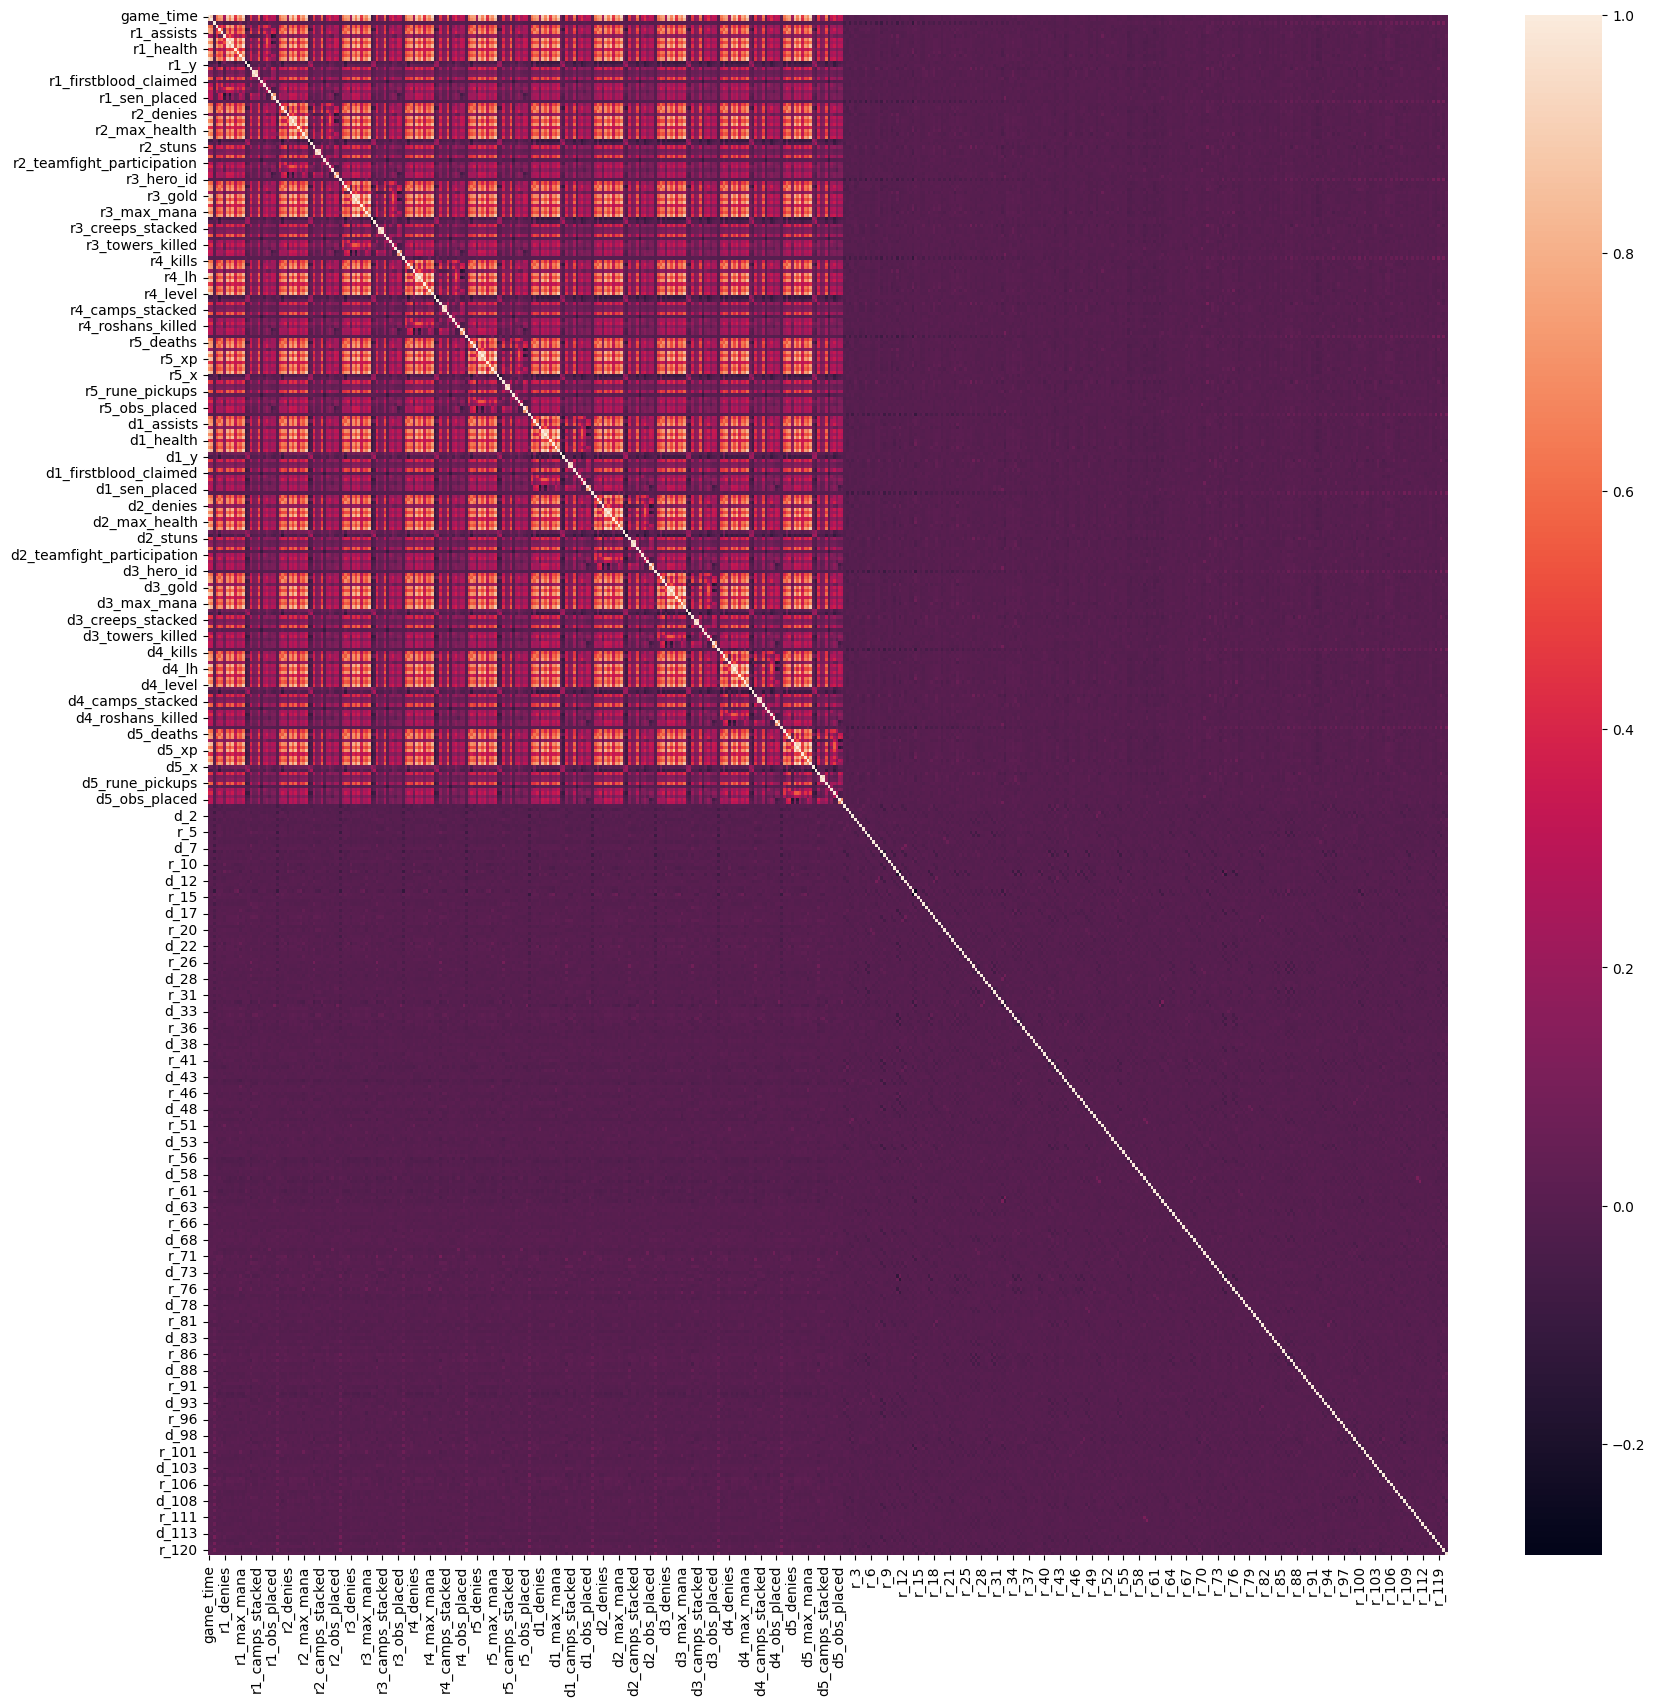

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_psth.corr())
plt.show()

In [6]:
df_tsth,target_psth = teamstats_teamheros_transform(df,target)

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

Dataframe Shape: (32153, 463) 

NaN Count:  0 

Single Hero Labels: ['r1_kills', 'r1_deaths', 'r1_assists', 'r1_denies', 'r1_gold', 'r1_lh', 'r1_xp', 'r1_health', 'r1_max_health', 'r1_max_mana', 'r1_level', 'r1_x', 'r1_y', 'r1_stuns', 'r1_creeps_stacked', 'r1_camps_stacked', 'r1_rune_pickups', 'r1_firstblood_claimed', 'r1_teamfight_participation', 'r1_towers_killed', 'r1_roshans_killed', 'r1_obs_placed', 'r1_sen_placed', 'r2_kills', 'r2_deaths', 'r2_assists', 'r2_denies', 'r2_gold', 'r2_lh', 'r2_xp', 'r2_health', 'r2_max_health', 'r2_max_mana', 'r2_level', 'r2_x', 'r2_y', 'r2_stuns', 'r2_creeps_stacked', 'r2_camps_stacked', 'r2_rune_pickups', 'r2_firstblood_claimed', 'r2_teamfight_participation', 'r2_towers_killed', 'r2_roshans_killed', 'r2_obs_placed', 'r2_sen_placed', 'r3_kills', 'r3_deaths', 'r3_assist

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

Dataframe Shape: (32153, 463) 

NaN Count:  0 

Single Hero Labels: ['r1_kills', 'r1_deaths', 'r1_assists', 'r1_denies', 'r1_gold', 'r1_lh', 'r1_xp', 'r1_health', 'r1_max_health', 'r1_max_mana', 'r1_level', 'r1_x', 'r1_y', 'r1_stuns', 'r1_creeps_stacked', 'r1_camps_stacked', 'r1_rune_pickups', 'r1_firstblood_claimed', 'r1_teamfight_participation', 'r1_towers_killed', 'r1_roshans_killed', 'r1_obs_placed', 'r1_sen_placed', 'r2_kills', 'r2_deaths', 'r2_assists', 'r2_denies', 'r2_gold', 'r2_lh', 'r2_xp', 'r2_health', 'r2_max_health', 'r2_max_mana', 'r2_level', 'r2_x', 'r2_y', 'r2_stuns', 'r2_creeps_stacked', 'r2_camps_stacked', 'r2_rune_pickups', 'r2_firstblood_claimed', 'r2_teamfight_participation', 'r2_towers_killed', 'r2_roshans_killed', 'r2_obs_placed', 'r2_sen_placed', 'r3_kills', 'r3_deaths', 'r3_assist

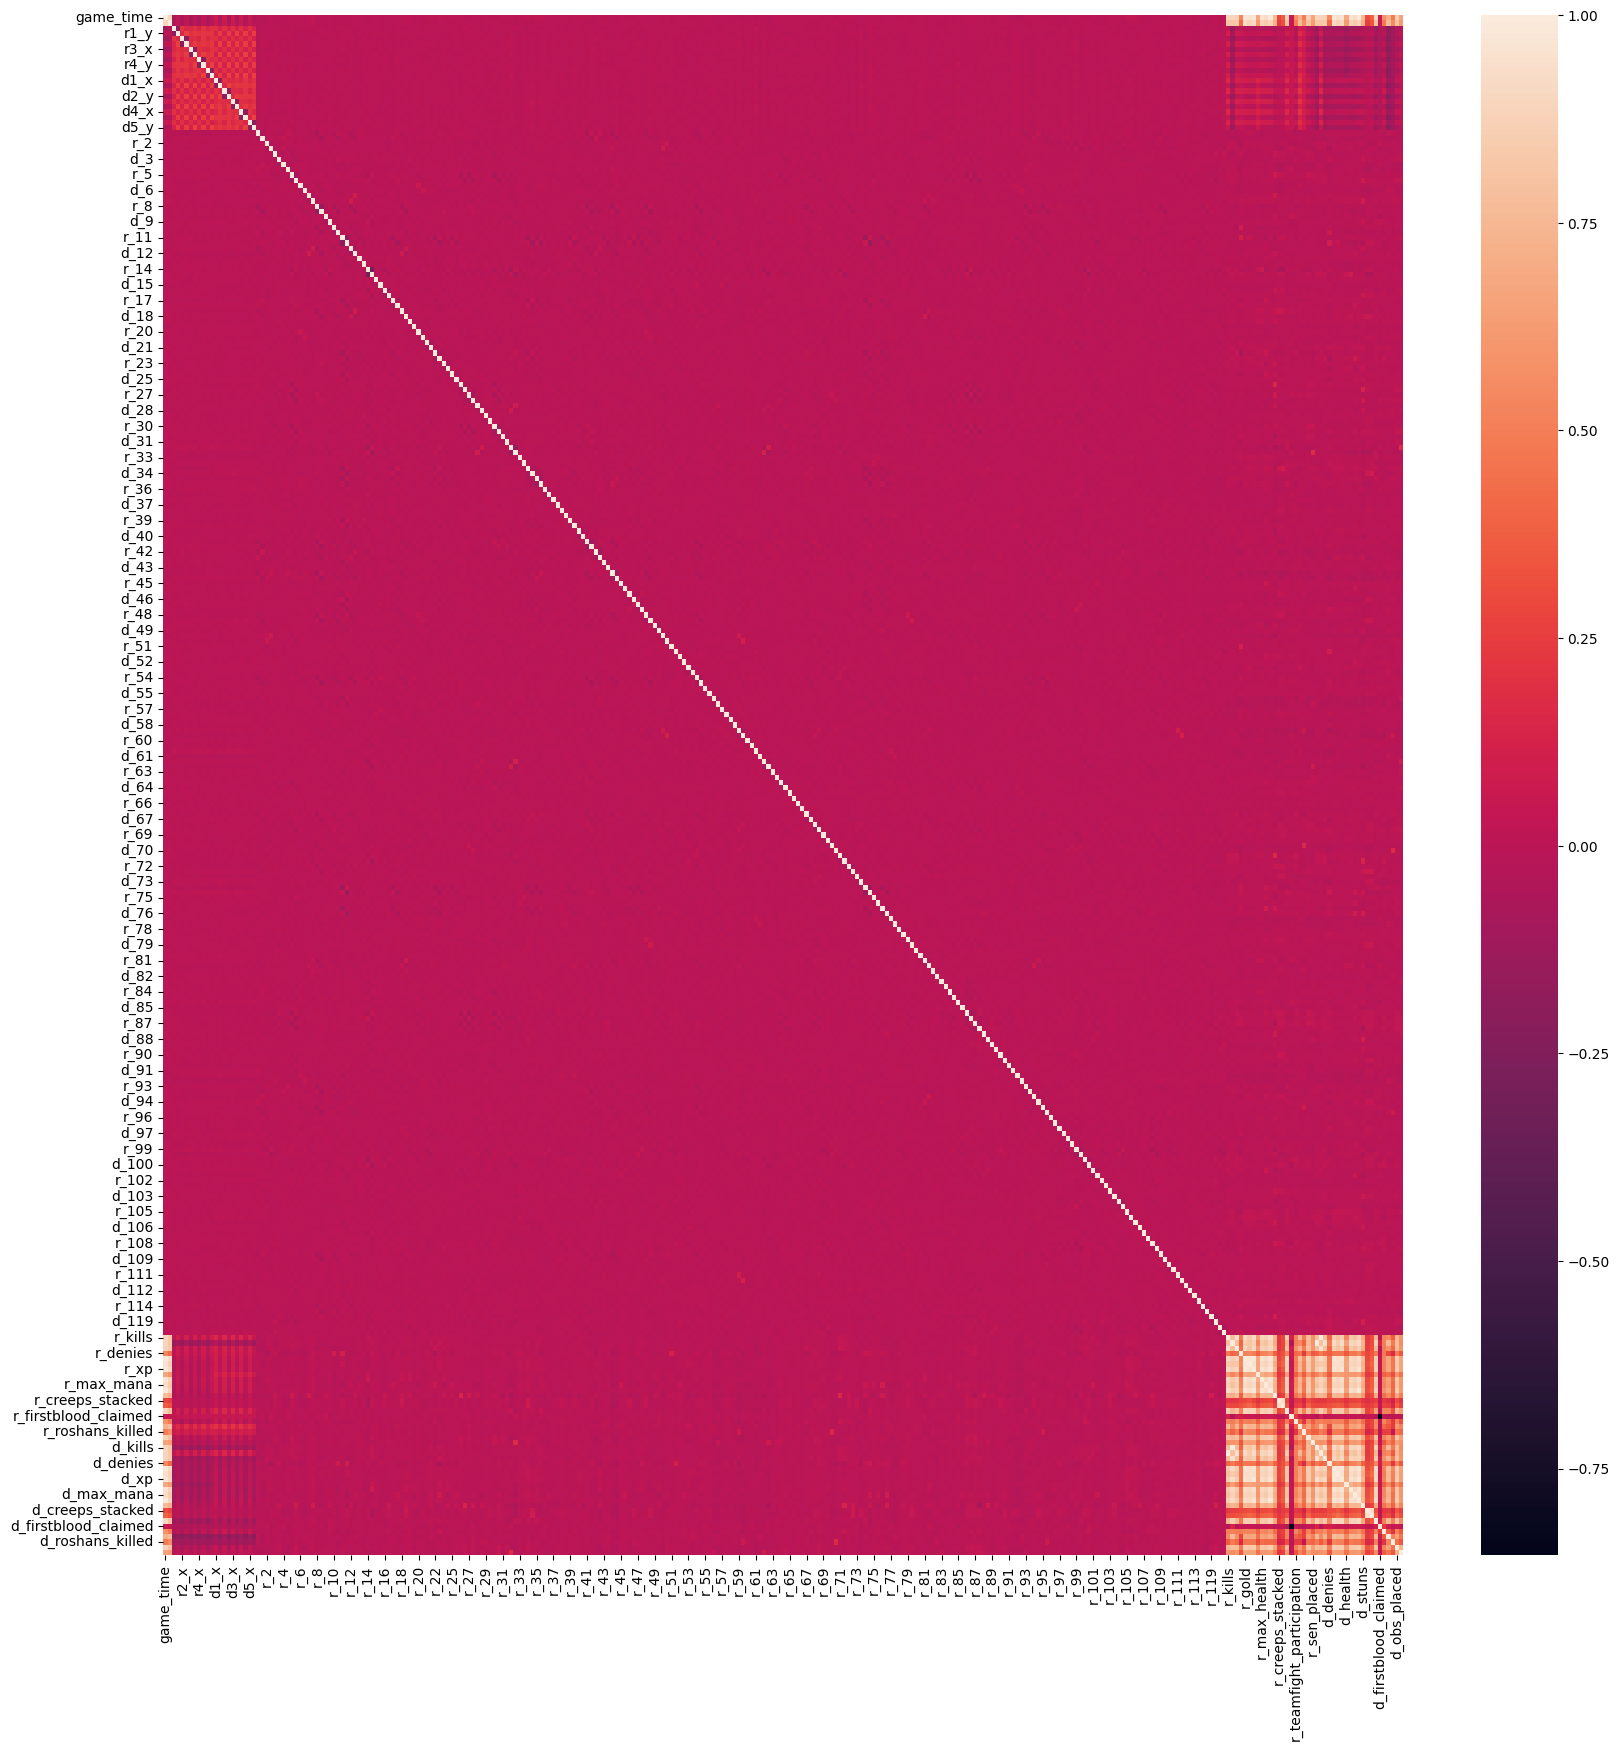

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df_tsth.corr())
plt.show()

In [7]:
df_tsth = drop_heros_labels(df_tsth)
df_psth = drop_heros_labels(df_psth)
df_psph = drop_heros_labels(df_psph)

Hero Id Labels: [] 

Dropped Dataframe Shape: (32153, 64)
Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Dropped Dataframe Shape: (32153, 462)
Hero Id Labels: [] 

Dropped Dataframe Shape: (32153, 1382)


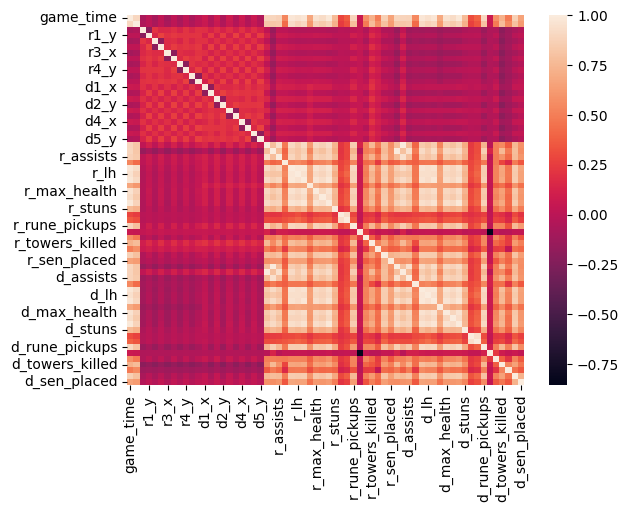

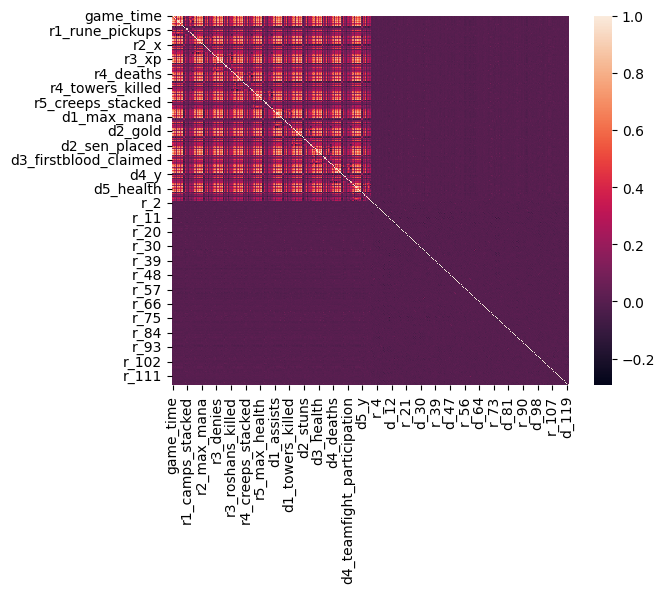

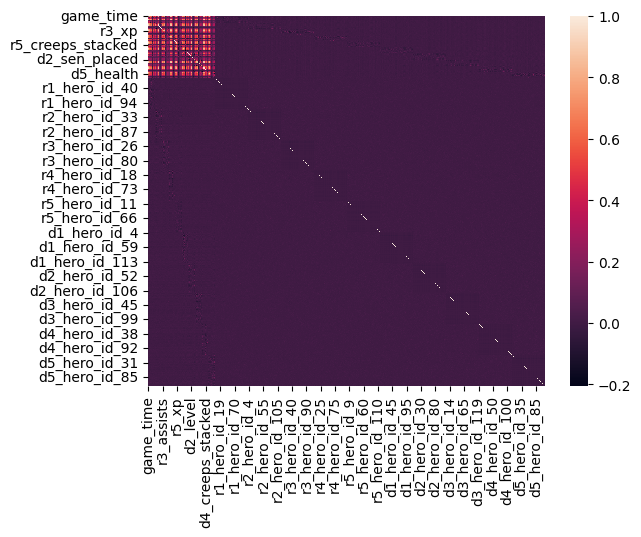

In [8]:
sns.heatmap(df_tsth.corr())
plt.show()
sns.heatmap(df_psth.corr())
plt.show()
sns.heatmap(df_psph.corr())
plt.show()

In [6]:
from sklearn.decomposition import PCA, KernelPCA

